In [177]:
import torch
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Загрузим датасет с параметрами вин и разделим его на тренировочную и тестовую выборки 

In [297]:
wine = load_wine()
features = 2

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :features], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [245]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# Построим искусственную нейронную сеть

In [298]:
class WineNet(torch.nn.Module):
    def __init__(self, n_input, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
        self.activ1 = torch.nn.ReLU()
        #self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        #self.activ2 = torch.nn.Relu()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        #x = self.fc2(x)
        #x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

n_hidden =  15
wine_net = WineNet(features, n_hidden)

# Функция потерь и оптимизатор

In [308]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

# Обучим искусственную нейронную сеть

In [309]:
batch_size = 10
for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())
#test_preds = wine_net.inference(X_test)

tensor(0.6481)
tensor(0.6111)
tensor(0.6667)
tensor(0.6667)
tensor(0.7037)
tensor(0.6852)
tensor(0.7037)
tensor(0.7037)
tensor(0.6852)
tensor(0.7037)


In [310]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [311]:
data_train1 = wine_net.inference(X_train).argmax(dim=1)
data_train2 = wine_net.inference(X_train)

In [312]:
data_test1 = wine_net.inference(X_test).argmax(dim=1)
data_test2 = wine_net.inference(X_test)

In [314]:
loss(torch.FloatTensor([1,2]), torch.FloatTensor([3,4]))

tensor(4.)

In [315]:
class WineNet(torch.nn.Module):
    def __init__(self, n_input, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
        self.activ1 = torch.nn.ReLU()
        #self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        #self.activ2 = torch.nn.Relu()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        #x = self.fc2(x)
        #x = self.activ2(x)
        x = self.fc3(x)
        x = self.sm(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        #x = self.sm(x)
        return x

n_hidden =  15
wine_net = WineNet(features, n_hidden)

In [322]:
batch_size = 20
wine_net.train()
for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = data_train2[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        print(loss_value)
        loss_value.backward()
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == data_test2).float().mean())
#test_preds = wine_net.inference(X_test)

tensor(0.2560, grad_fn=<MeanBackward0>)


RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [168]:
wine_net.fc2.weight;

# Посчитаем точность

In [169]:
accuracy = np.asarray((test_preds.argmax(dim=1) == y_test).float().mean())
accuracy

array(0.8518519, dtype=float32)

# Изобразим (только в случае 2х признаков) получившиеся оценки вин
Области - предсказания ИНС, точки - истинные метки

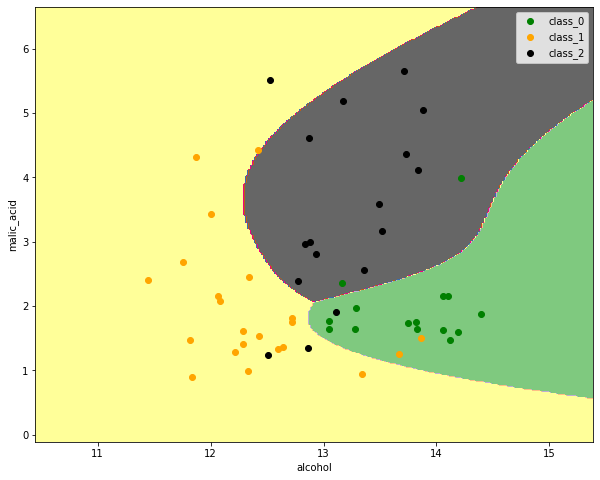

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_test == i)
    plt.scatter(X_test[indexes, 0], 
                X_test[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Вероятность принадлежности точки к одному из трёх классов:

In [179]:
print(test_preds[0], '\nТочка принадлежит к {0} классу. Апорстериорная вероятность, предсказанная ИНС: {1}'.format(test_preds.data.numpy().argmax(axis=1)[0], test_preds.data.numpy().max(axis=1)[0], 4))

tensor([0.9094, 0.0019, 0.0887], grad_fn=<SelectBackward>) 
Точка принадлежит к 0 классу. Апорстериорная вероятность, предсказанная ИНС: 0.9094228148460388


In [180]:
y_test[0]

tensor(0)

In [58]:
#Байесовский классификатор
from sklearn import datasets
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
#iris = datasets.load_iris()
gnb = GaussianNB()
pred = gnb.fit(X_test, y_test).predict(X_test)
preds2 = gnb.fit(X_test, y_test).predict_proba(X_test)
accuracy = accuracy_score(y_test, pred)
print("accruracy:", accuracy)

accruracy: 0.8703703703703703


In [172]:
preds2[0]

array([0.96649497, 0.00597376, 0.02753126])

In [174]:
pred = torch.LongTensor(pred)
print('Число различий байесовского метода и нейронной сети:',sum(~(test_preds.argmax(axis=1) == pred).numpy()))

Число различий байесовского метода и нейронной сети: 34


In [181]:
y_data = test_preds